In [19]:
#script for reading data from 4 batch sizes and combining the plots
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import auc
import numpy as np
bs32dir = "./model/bs32/"
bs64dir = "./model/bs64/"
bs128dir = "./model/bs128/"
bs256dir = "./model/bs256/"


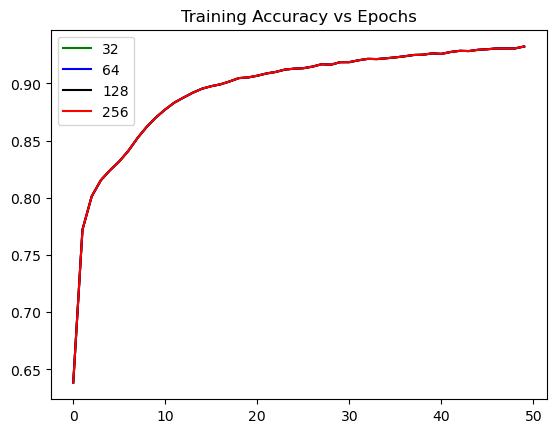

In [16]:
#combined accuracy plot
bs32acc = pd.read_csv(bs32dir + "accuracy.txt", sep=" ", header=None)
bs32acc.columns = ["32"]

bs64acc = pd.read_csv(bs64dir + "accuracy.txt", sep=" ", header=None)
bs64acc.columns = ["64"]

bs128acc = pd.read_csv(bs128dir + "accuracy.txt", sep=" ", header=None)
bs128acc.columns = ["128"]

bs256acc = pd.read_csv(bs256dir + "accuracy.txt", sep=" ", header=None)
bs256acc.columns = ["256"]

accuracies = pd.DataFrame(bs32acc)
accuracies['64'] = bs64acc
accuracies['128'] = bs128acc
accuracies['256'] = bs256acc


# Get current axis
ax = plt.gca()
 
accuracies.plot(kind='line',
        use_index=True,
        y='32',
        color='green', ax=ax)
 
accuracies.plot(kind='line', 
        use_index=True,
        y='64',
        color='blue', ax=ax)
accuracies.plot(kind='line', 
        use_index=True,
        y='128',
        color='black', ax=ax)
accuracies.plot(kind='line', 
        use_index=True,
        y='256',
        color='red', ax=ax)
# set the title
plt.title('Training Accuracy vs Epochs')
 
# show the plot
plt.show()

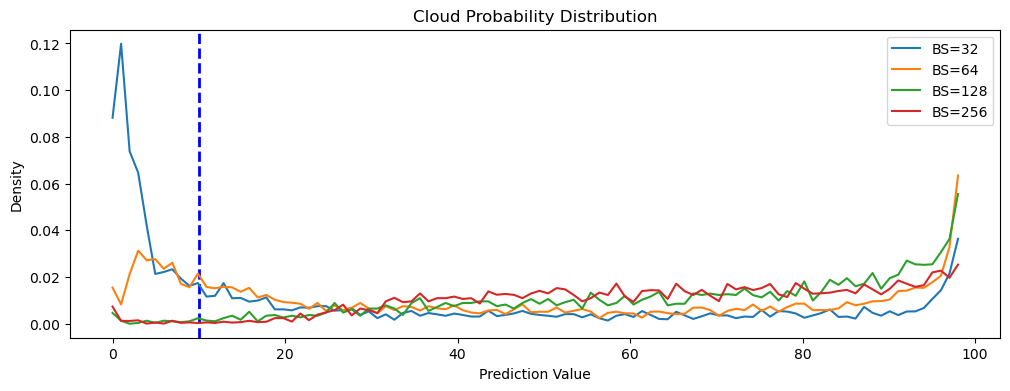

In [32]:
#combined predictions plot
bs32prob = pd.read_csv(bs32dir + "probabilities.txt", sep=" ", header=None)
bs32prob.columns = ["32"]

bs64prob = pd.read_csv(bs64dir + "probabilities.txt", sep=" ", header=None)
bs64prob.columns = ["64"]

bs128prob = pd.read_csv(bs128dir + "probabilities.txt", sep=" ", header=None)
bs128prob.columns = ["128"]

bs256prob = pd.read_csv(bs256dir + "probabilities.txt", sep=" ", header=None)
bs256prob.columns = ["256"]

probs = pd.DataFrame(bs32prob)
probs['64'] = bs64prob
probs['128'] = bs128prob
probs['256'] = bs256prob





hist32, bins = np.histogram(probs['32'], bins=100, density=True)
hist64, bins = np.histogram(probs['64'], bins=100, density=True)
hist128, bins = np.histogram(probs['128'], bins=100, density=True)
hist256, bins = np.histogram(probs['256'], bins=100, density=True)
fig2 = plt.figure(figsize=(12, 4))
th = 0.1
plt.axvline(int(th * 100), color='b', linewidth=2, linestyle='--')
plt.plot(bins[0:100:1], hist32, label='BS=32')
plt.plot(bins[0:100:1], hist64, label='BS=64')
plt.plot(bins[0:100:1], hist128, label='BS=128')
plt.plot(bins[0:100:1], hist256, label='BS=256')
# set the title
plt.title('Cloud Probability Distribution')
plt.xlabel("Prediction Value")
plt.ylabel("Density")
plt.legend(loc='best')

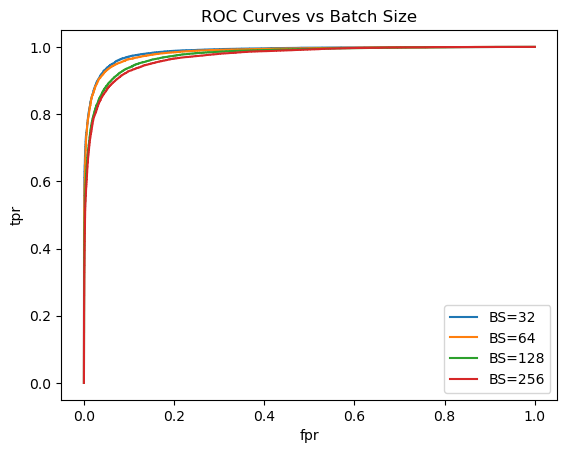

In [37]:
#combined ROC plot
bs32ROC = pd.read_csv(bs32dir + "ROC.txt", sep=" ", header=None)
bs32ROC.columns = ["fpr", "tpr", "th"]

bs64ROC = pd.read_csv(bs64dir + "ROC.txt", sep=" ", header=None)
bs64ROC.columns = ["fpr", "tpr", "th"]

bs128ROC = pd.read_csv(bs128dir + "ROC.txt", sep=" ", header=None)
bs128ROC.columns = ["fpr", "tpr", "th"]

bs256ROC = pd.read_csv(bs256dir + "ROC.txt", sep=" ", header=None)
bs256ROC.columns = ["fpr", "tpr", "th"]



plt.plot(bs32ROC['fpr'], bs32ROC['tpr'], label='BS=32')
plt.plot(bs64ROC['fpr'], bs64ROC['tpr'], label='BS=64')
plt.plot(bs128ROC['fpr'], bs128ROC['tpr'], label='BS=128')
plt.plot(bs256ROC['fpr'], bs256ROC['tpr'], label='BS=256')
# set the title
plt.title('ROC Curves vs Batch Size')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend(loc='best')
# set the title
 
# show the plot
plt.show()